In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

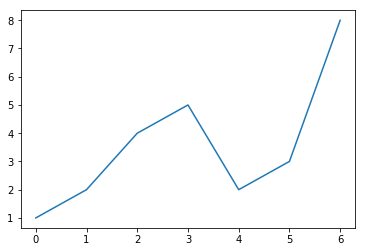

In [2]:
x=np.arange(10)
y=np.sin(x)
plt.plot([1,2,4,5,2,3,8])
plt.show()

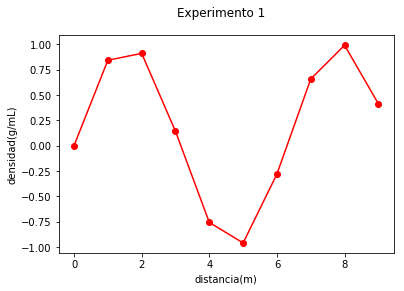

In [5]:
x=np.arange(10)
y=np.sin(x)
plt.plot(x,y,'ro-')
plt.xlabel("distancia(m)")
plt.ylabel("densidad(g/mL)")
plt.suptitle("Experimento 1")
plt.show()

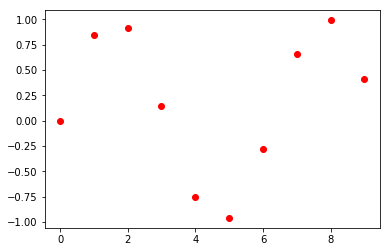

In [7]:
x=np.arange(10)
y=np.sin(x)
plt.plot(x,y,'ro')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

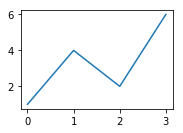

In [8]:
plt.subplot(2,2,1)
plt.plot([1,4,2,6])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

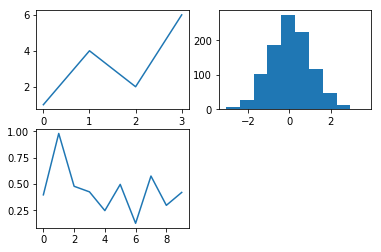

In [9]:
plt.subplot(2,2,1)
plt.plot([1,4,2,6])
plt.subplot(2,2,2)
plt.hist(np.random.randn(1000))
plt.subplot(2,2,3)
plt.plot(np.random.rand(10))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

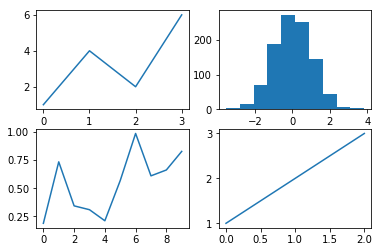

In [10]:
plt.subplot(2,2,1)
plt.plot([1,4,2,6])
plt.subplot(2,2,2)
plt.hist(np.random.randn(1000))
plt.subplot(2,2,3)
plt.plot(np.random.rand(10))
plt.subplot(2,2,4)
plt.plot([1,2,3])
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

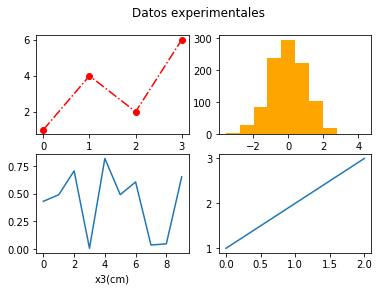

In [13]:
plt.subplot(2,2,1)
plt.plot([1,4,2,6],'ro-.')
plt.xlabel("x1")
plt.subplot(2,2,2)
plt.hist(np.random.randn(1000),color="orange")
plt.subplot(2,2,3)
plt.plot(np.random.rand(10))
plt.xlabel("x3(cm)")
plt.subplot(2,2,4)
plt.plot([1,2,3])
plt.suptitle("Datos experimentales")
plt.show

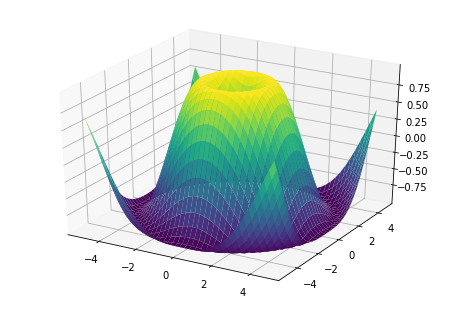

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

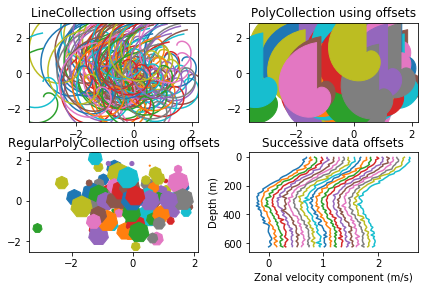

In [15]:
import matplotlib.pyplot as plt
from matplotlib import collections, colors, transforms
import numpy as np

nverts = 50
npts = 100

# Make some spirals
r = np.arange(nverts)
theta = np.linspace(0, 2*np.pi, nverts)
xx = r * np.sin(theta)
yy = r * np.cos(theta)
spiral = np.column_stack([xx, yy])

# Fixing random state for reproducibility
rs = np.random.RandomState(19680801)

# Make some offsets
xyo = rs.randn(npts, 2)

# Make a list of colors cycling through the default series.
colors = [colors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(top=0.92, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2), (ax3, ax4)) = axes  # unpack the axes


col = collections.LineCollection([spiral], offsets=xyo,
                                 transOffset=ax1.transData)
trans = fig.dpi_scale_trans + transforms.Affine2D().scale(1.0/72.0)
col.set_transform(trans)  # the points to pixels transform
# Note: the first argument to the collection initializer
# must be a list of sequences of x,y tuples; we have only
# one sequence, but we still have to put it in a list.
ax1.add_collection(col, autolim=True)
# autolim=True enables autoscaling.  For collections with
# offsets like this, it is neither efficient nor accurate,
# but it is good enough to generate a plot that you can use
# as a starting point.  If you know beforehand the range of
# x and y that you want to show, it is better to set them
# explicitly, leave out the autolim kwarg (or set it to False),
# and omit the 'ax1.autoscale_view()' call below.

# Make a transform for the line segments such that their size is
# given in points:
col.set_color(colors)

ax1.autoscale_view()  # See comment above, after ax1.add_collection.
ax1.set_title('LineCollection using offsets')


# The same data as above, but fill the curves.
col = collections.PolyCollection([spiral], offsets=xyo,
                                 transOffset=ax2.transData)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax2.add_collection(col, autolim=True)
col.set_color(colors)


ax2.autoscale_view()
ax2.set_title('PolyCollection using offsets')

# 7-sided regular polygons

col = collections.RegularPolyCollection(
    7, sizes=np.abs(xx) * 10.0, offsets=xyo, transOffset=ax3.transData)
trans = transforms.Affine2D().scale(fig.dpi / 72.0)
col.set_transform(trans)  # the points to pixels transform
ax3.add_collection(col, autolim=True)
col.set_color(colors)
ax3.autoscale_view()
ax3.set_title('RegularPolyCollection using offsets')


# Simulate a series of ocean current profiles, successively
# offset by 0.1 m/s so that they form what is sometimes called
# a "waterfall" plot or a "stagger" plot.

nverts = 60
ncurves = 20
offs = (0.1, 0.0)

yy = np.linspace(0, 2*np.pi, nverts)
ym = np.max(yy)
xx = (0.2 + (ym - yy) / ym) ** 2 * np.cos(yy - 0.4) * 0.5
segs = []
for i in range(ncurves):
    xxx = xx + 0.02*rs.randn(nverts)
    curve = np.column_stack([xxx, yy * 100])
    segs.append(curve)

col = collections.LineCollection(segs, offsets=offs)
ax4.add_collection(col, autolim=True)
col.set_color(colors)
ax4.autoscale_view()
ax4.set_title('Successive data offsets')
ax4.set_xlabel('Zonal velocity component (m/s)')
ax4.set_ylabel('Depth (m)')
# Reverse the y-axis so depth increases downward
ax4.set_ylim(ax4.get_ylim()[::-1])


plt.show()